# **Milestone 2 - Phase 1**

# **1. Perkenalan**

Nama: `Evita Ardhiya Ramadhani`, Batch: `11`

Dataset Predictive maintenance, source: kaggle

Problem: Membuat Model klasifikasi untuk memprediksi adanya Failure dari dataset Predictive maintenance

Assigment Objective:
- Mampu memahami konsep supervised learning dan unsupervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
- Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning
- Mampu melakukan model deployment

# **2. Import Libraries**

Import libraries yang digunakan dalam pengerjaan assigment seperti pandas, numpy, matplotlib dan sebagainya.

In [77]:
# Import Libraries load data 
import pandas as pd 
import numpy as np 

# library untuk plot
import matplotlib.pyplot as plt
import seaborn as sns

# Split data train-set dan test-set
from sklearn.model_selection import train_test_split 

# handling outliers
from feature_engine.outliers import Winsorizer

# Feature Scaling
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# model definition
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# build pipeline
from sklearn.pipeline import make_pipeline

# handling imbalance data
from imblearn.over_sampling import SMOTE

# saving model
import pickle

import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**

Load dataset yang digunakan dalam assigment

In [78]:
# load dataset
data = pd.read_csv('predictive_maintenance.csv')
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


Deskripsi kolom:
- **UDI** : Indeks dari 1-10000
- **Product ID** : Variasi tiap-tiap produk (setiap produk berbeda)
- **Type** : Tipe dari produk L (low), M (Medium), H (high)
- **Air temperature** : suhu udara dalam satuan K (Kelvin)
- **Process temperature** : suhu proses dalam satuan K (Kelvin)
- **Rotational speed** : kecepatan rotasi dalam satuan rpm
- **Torque** : besar torsi dalam satuan newton meter (NM)
- **Tool wear** : keausan pahat 
- **Target** : Terjadi kegagalan atau tidak (0= no, 1= yes)
- **Failure Type** : Tipe dari kegagagalan

Lakukan duplicate dataset sebelum dilakukan proses pada data, tujuannya untuk menyimpan dataset asli jika sewaktu-waktu dibutuhkan

In [79]:
# duplicate dataset
data_copy = data.copy()

Tampilkan head dan tail dari dataset

In [80]:
# 5 baris teratas dataset
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [81]:
# 5 baris terakhir dataset
data.tail(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


Untuk mengetahui informasi mengenai dataset dapat menggunakan .info(), disini kita dapat mengetahui jumlah non-null kolom dan tipe kolom

In [82]:
# info dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


- Tidak terdapat data yang memiliki missing value kaena jumlah non-null semua kolom sama dengan jumlah baris dataset
- Dataset terdiri atas tipe data object, integer dan float

Untuk mengecek nilai statistik seperti mean, median, modus dsb dapat menggunakan .describe

In [83]:
# describe dataset
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


- describe hanya bisa menghitung kolom bersifat numerik
- dari kolom air temperatur rata-rata suhu udara 300 K atau sama 27 derajat C

# **4. Exploratory Data Analysis (EDA)**

## Korelasi antara fitur dan target

Lakukan encoding terlebih dahulu agar data tipe objek dapat tetap dimasukkan dalam heatmap.

In [84]:
# definisikan encoder
encoder1 = OrdinalEncoder()

# fit dan transform data untuk melakukan encoding
data_encoder = encoder1.fit_transform(data)

# membuat data encoder dalam bentuk dataframe
data_encoder_df = pd.DataFrame(data_encoder, columns= data.columns)
data_encoder_df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,0.0,7003.0,2.0,28.0,29.0,325.0,313.0,0.0,0.0,1.0
1,1.0,1003.0,1.0,29.0,30.0,182.0,348.0,2.0,0.0,1.0
2,2.0,1004.0,1.0,28.0,28.0,272.0,379.0,4.0,0.0,1.0
3,3.0,1005.0,1.0,29.0,29.0,207.0,280.0,6.0,0.0,1.0
4,4.0,1006.0,1.0,29.0,30.0,182.0,285.0,8.0,0.0,1.0


Masukkan dataframe yang telah diencoder dan buat plot heatmapnya

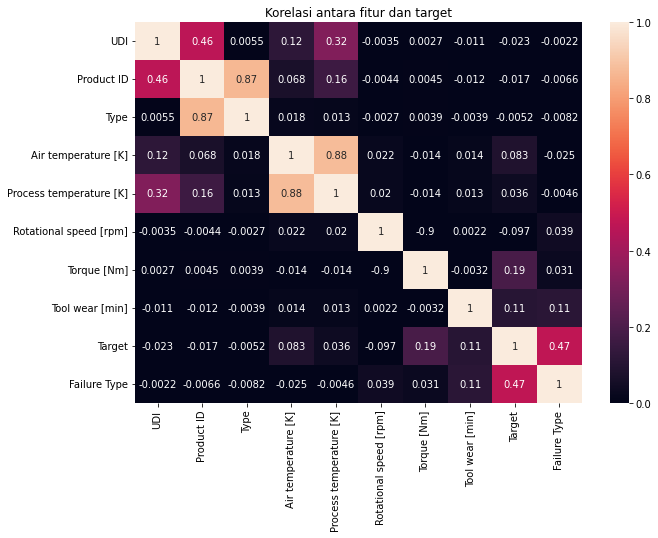

In [85]:
# cek korelasi 
korelasi = data_encoder_df.corr()

# buat heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(korelasi, annot= True, vmin=0, vmax=1)
plt.title('Korelasi antara fitur dan target')
plt.show()

- Fitur yang memiliki korelasi yang cukup tinggi terhadap target yaitu torsi, tool wear, dan suhu udara
- Pada dataset ini terdapat 2 kolom target yaitu Target dan Failure Type. Untuk menghindari dataleak maka akan digunakan 1 saja sebagai target yaitu kolom Target
- Kolom Target diambil sebagai y(target) karena lebih memiliki korelasi yang tinggi terhadap fitur dibandingkan dengan failure type
- Suhu udara dan suhu proses memiliki korelasi yang cukup besar, oleh karena itu akan dilakukan drop pada kolom suhu udara
- Diambil kolom suhu proses karena lebih dapat merepsentasikan jika ingin mengetahui kegagalan suatu produk

## Perbandingan data target

Mengecek jumlah dari masing-masing label bertujuan untuk melihat apakah data target imbalance atau tidak

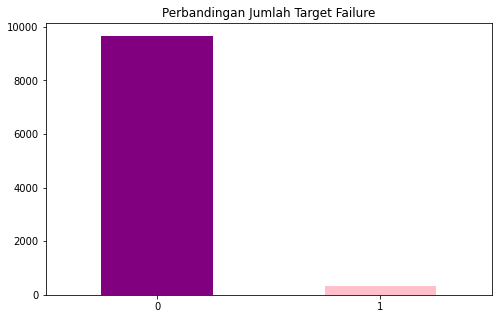

In [86]:
# hitung jumlah tiap kategori dan buat barplot
data['Target'].value_counts().plot(kind='bar', color=['purple', 'pink'], figsize=(8,5))
plt.title('Perbandingan Jumlah Target Failure')
plt.xticks(rotation=0)
plt.show()

- Data target imbalance karena jumlah dari label 0 sangat banyak sedangkan label 0 sangat sedikit
- termasuk data imbalance yang extrem karena label 1 hanya 3,39% dari jumlah keseluruhan data target
- Perlu dilakukan balancing data agar model tidak overfit

## Persentase tipe produk

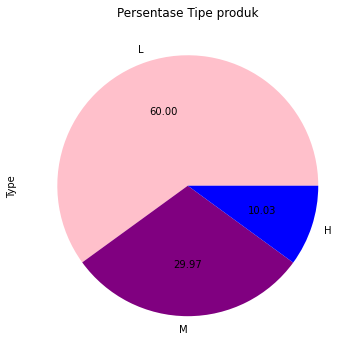

In [87]:
# jumlah tiap kategori tipe dan buat chartpie
data['Type'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%.2f', colors=['pink', 'purple', 'blue'])
plt.title('Persentase Tipe produk')
plt.show()

- Lebih banyak produk yang bertipe L (low)
- Produk tipe M hanya memiliki jumlah 10.03%

## Tipe manakah yang tidak memiliki failure?

Type  Target
H     0          982
      1           21
L     0         5765
      1          235
M     0         2914
      1           83
Name: Target, dtype: int64


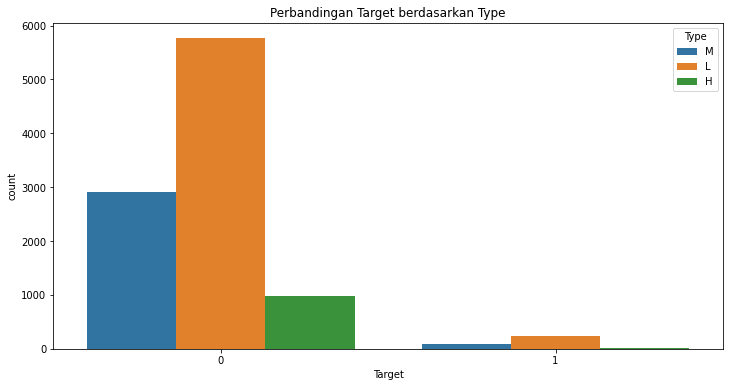

In [88]:
# jumlah perbandingan tipe berdasarkan target 
print(data.groupby('Type')['Target'].value_counts())

# plot perbandingan tipe berdasarkan target
plt.figure(figsize=(12,6))
sns.countplot(data=data, x=data['Target'], hue=data['Type'])
plt.title('Perbandingan Target berdasarkan Type')
plt.show()

- Setiap tipe memiliki nilai 1 atau terjadi failure tetapi dengan jumlah yang sedikit
- Berdasarakn grafik dan hasil gruopby tipe L memiliki jumlah yang paling banyak yaitu 5765, setengah dari keseluruhan dataset

## Pengaruh torsi terhadap kecepatan putaran

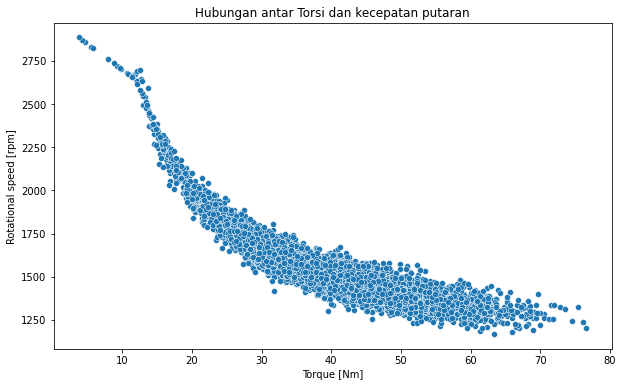

In [89]:
# hubungan antara torsi dan kecepatan putaran
plt.figure(figsize=(10,6))
sns.scatterplot(x='Torque [Nm]',y='Rotational speed [rpm]',data=data)
plt.title('Hubungan antar Torsi dan kecepatan putaran')
plt.show()

- Pada heatmap diatas diketahui bahwa korelasi antara torsi dan kecepatan rotasi memiliki angka -0.9, hal ini menandakan bahwa antara kedua fitur tersebut memiliki korelasi yang tinggi tetapi nilainya minus.
- Jadi jika torsi tinggi maka kecepatan putaran akan kecil, oleh karena itu hubungannya berbanding terbalik.

# **5. Data Preprocessing**

## Split data inferece

Data inferece merupakan data yang nantinya dianggap sebagai data baru setelah model terbaik dibuat. Data inferece diambil secara random dari dataset dan definisikan angka random state agar jika program dijalankan ulang data random yang diambil tetap sama.

In [90]:
# split 100 data inference dengan random state 17
data_inf = data.sample(100, random_state=17)
data_inf.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2688,2689,L49868,L,299.9,309.4,1322,53.9,33,0,No Failure
233,234,L47413,L,298.2,308.4,1512,34.9,181,0,No Failure
9099,9100,H38513,H,297.3,308.1,1477,52.3,2,0,No Failure
8652,8653,H38066,H,297.3,308.3,1461,41.5,108,0,No Failure
2842,2843,L50022,L,300.3,309.3,1345,53.5,192,0,No Failure


Lakukan drop pada data inference untuk mencegah adanya data leak pada saat melakukan prediksi, dataset yang telah dihapus akan digunakan sebagai data train dan test.

In [91]:
# Drop data inference dari dataset
data_train_test = data.drop(data_inf.index)
data_train_test.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


Atur kembali index untuk data inferece dan data train test karena data inferece diambil secara random maka urutan index tidak sesuai

In [92]:
# Reset index data train test
data_train_test.reset_index(drop=True, inplace=True)

# Reset index data inference
data_inf.reset_index(drop=True, inplace=True)

## Split Data train-test

Definiskan fitur-fitur dan target

In [93]:
# data fitur (X)
X = data_train_test.drop('Target', axis=1)

# data target (y)
y = data_train_test['Target']

Split data train sebagai pembelajaran model dan data test sebagai ujian model.

In [94]:
# split data train dan test dengan perbandingan 80:10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [95]:
# tampilkan size dataset, train dan test
print('Size dataset:', data_train_test.shape)
print('Size X-Train:', X_train.shape)
print('Size y-Train:', y_train.shape)
print('Size X-Test:', X_test.shape)
print('Size y-Test:', y_test.shape)

Size dataset: (9900, 10)
Size X-Train: (7920, 9)
Size y-Train: (7920,)
Size X-Test: (1980, 9)
Size y-Test: (1980,)


## Data Cleaning

Pertama, cek missing value pada fitur dan target

In [96]:
# missing value dari masing-masing data
print('Missing value X-train:', X_train.isnull().sum().sum())
print('Missing value y-train:', y_train.isnull().sum().sum())
print('Missing value X-test:', X_test.isnull().sum().sum())
print('Missing value y-test:', y_test.isnull().sum().sum())

Missing value X-train: 0
Missing value y-train: 0
Missing value X-test: 0
Missing value y-test: 0


Kedua, cek outliers pada X train saja

In [97]:
#definisikan kolom yang akan dicek outliersnya
cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']

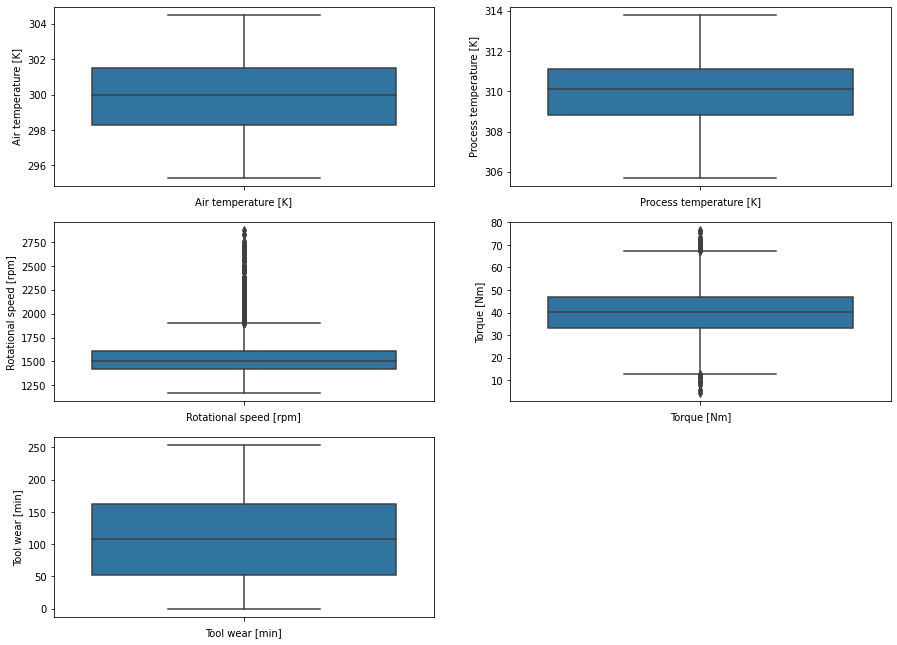

In [98]:
# definisikan besar figsize
plt.figure(figsize=(15,35))

# buat looping untuk boxplot kolom
for i, col in enumerate(cols):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=X_train[col])
        plt.xlabel(col)
        
plt.show()

- terdapat outliers pada fitur Rotational speed [rpm] dan Torque [Nm]
- handling outliers menggunakan metode capping agar tidak menghilangkan data

In [99]:
# membuat capper
windsoriser = Winsorizer(capping_method='gaussian', tail='both', fold=1.5, variables=['Rotational speed [rpm]', 'Torque [Nm]'])

# fit dan transform data
X_train_handle = windsoriser.fit_transform(X_train)

Setelah handling outliers


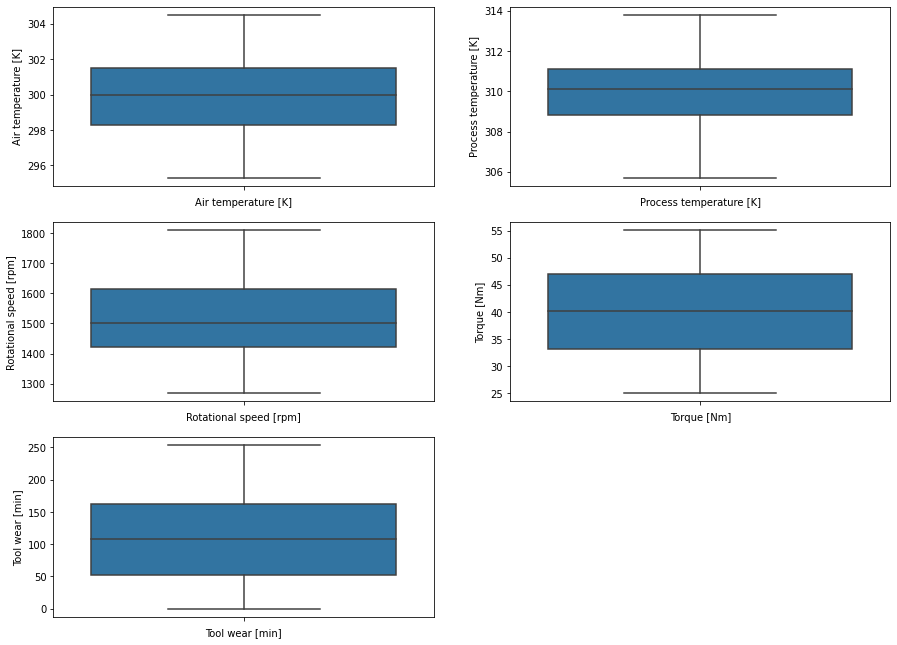

In [100]:
print('Setelah handling outliers')

# definisikan besar figsize
plt.figure(figsize=(15,35))

# buat looping untuk boxplot kolom
for i, col in enumerate(cols):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(y=X_train_handle[col])
        plt.xlabel(col)
        
plt.show()

- setelah dilakukan handling outliers maka distribusi dari datanya berubah dari skew menjadi distribusi normal

## Feature Selection

Feature selection bertujuan untuk memilih fitur apa saja yang akan digunakan untuk membantu model dalam prediksi

In [101]:
# menampilkan x-train setelah di handling
X_train_handle

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
5063,5115,M19974,M,304.2,313.8,1481.0,44.900000,136,No Failure
1002,1013,M15872,M,296.1,307.1,1433.0,38.500000,14,No Failure
7562,7636,L54815,L,300.3,311.4,1526.0,38.500000,101,No Failure
1028,1039,L48218,L,296.6,307.6,1498.0,41.100000,80,No Failure
7693,7768,H37181,H,300.2,311.4,1319.0,54.600000,15,No Failure
...,...,...,...,...,...,...,...,...,...
8470,8553,L55732,L,298.2,309.1,1467.0,44.500000,80,No Failure
6061,6121,M20980,M,300.9,311.2,1472.0,40.000000,93,No Failure
9529,9627,M24486,M,299.0,310.0,1341.0,55.082354,126,No Failure
406,412,L47591,L,297.5,308.7,1429.0,44.300000,201,No Failure


drop kolom dengan beberapa alasannya:
- Fitur UDI dan Product ID karena merupakan kolom yang semuanya unik. Artinya setiap data memiliki id yang berbeda-beda dan antara tiap-tiap id tidak akan mempengaruhi terjadinya failure atau tidak
- Fitur failure type karena ini merupakan target karena berisi hasil atau tujuan dilakukan klasifikasi dan penulis telah mengambil kolom Target sebagai target dan untuk mencegah data leak kolom ini harus didrop
- Air temperature [K], karena memiliki korelasi yang tinggi terhadap fitur Process temperature [K]
- Jadi kolom yang akan didrop yaitu UDI, Product ID, type, Air temperature [K] dan failure type

In [102]:
# Drop column yang tidak digunakan pada X-train
X_train_handle.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Failure Type'],axis=1, inplace=True)

# Drop column yang tidak digunakan pada X-test
X_test.drop(['UDI', 'Product ID', 'Type','Air temperature [K]','Failure Type'],axis=1, inplace=True)

## Feature Scaling

Feature scaling digunakan untuk menyamakan range dari masing-masing fitur agar model mudah untuk mengindentifikasi. Scaling hanya untuk data numerik.

In [103]:
# definisikan scaling
scaler = StandardScaler()

# fit & transform X-train dan X-test
X_train_final = scaler.fit_transform(X_train_handle)
X_test_final = scaler.transform(X_test)

## Handling Imbalace data

Diketahui bahwa untuk label 0 memiliki banyak data dibandingkan dengan label 1, oleh karena itu harus dilakukan handling imbalce data agar model dapat makmimal dalam proses pembelajaran

In [104]:
# definisikan smot
smote = SMOTE(k_neighbors=5, random_state=17, sampling_strategy='all')

# lakukan resampling
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test_final, y_test)

In [105]:
# cek size dari data target
print(y_train_balanced.value_counts())
print(y_test_balanced.value_counts())

0    7656
1    7656
Name: Target, dtype: int64
0    1906
1    1906
Name: Target, dtype: int64


# **6. Pembuatan Model Klasifikasi**

## 6.1 Model Logistic Regression

### Model Definition

Definisikan model logistic regresion terlebih dahulu

In [106]:
# definisikan model
model_logistic = LogisticRegression()

Menggunakan gridsearch untuk mencari hyperparamter tuning

In [107]:
# definisikan parameter yang akan diuji
param_logistic = {'penalty': ['l1', 'l2'],
                    'solver': ['lbfgs', 'liblinear'],
                    'max_iter': [50, 100]}

# gridseacrh dengan cross validation 5 kali
logistic_grid = GridSearchCV(model_logistic, param_logistic, cv=5, scoring='accuracy', return_train_score=True)

### Model Training

Training model dengan menggunakan gridsearch

In [108]:
# Training model
logistic_grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [109]:
# definisikan estemator terbaik dengan model
logistic_best = logistic_grid.best_estimator_
print(logistic_best)

LogisticRegression(penalty='l1', solver='liblinear')


### Model Evaluation

Prediksi data train dan data test menggunakan model logististic regression yang telah hyperparameter tunning

In [110]:
# prediksi data train
y_pred_train_log = logistic_best.predict(X_train_balanced)
# prediksi data test
y_pred_test_log = logistic_best.predict(X_test_balanced)

Lakukan evaluasi hasil prediksi yang dilakukan oleh model dari hasil clasification report

In [111]:
# hasil train
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_log))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_log))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      7656
           1       0.72      0.72      0.72      7656

    accuracy                           0.72     15312
   macro avg       0.72      0.72      0.72     15312
weighted avg       0.72      0.72      0.72     15312


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1906
           1       0.76      0.83      0.79      1906

    accuracy                           0.78      3812
   macro avg       0.78      0.78      0.78      3812
weighted avg       0.78      0.78      0.78      3812



- Kasus ini merupakan pengecekan terhadap performa produk atau alat adakah terjadi kegagalan atau tidak, oleh krena itu titik berat yang dipertimbangankan adalah memperkecil nilai dari recall karena disini ada False Negative (negatif yang tidak benar/salah prediksi). Misalnya suatu alat diprediksi tidak mengalami failure padahal aktualnya alat tersebut terjadi failure maka akan lebih merugikan.
- Dapat dilihat bahwa akurasi yang diperoleh cukup baik yaitu untuk train 0.72 dan test 0.78. Sebenarnya hasil ini masih mengalami overfit karena nilai testnya memiliki selisih hingga 6% mungkin ini diakibatkan oleh data leak setelah dilakukannya handling imbalace data.
- Tetapi karena dataset ini telah dilakukan handling imblace, tidak mengapa jika akurasi dijadikan tolak ukur untuk melihat performa dari model.
- Model ini telah dilakukan handling imbalace data dan hyperparamter tunning pada model tetapi hasil modelnya belum maksimal, hal ini bisa saja disebabkan dari dataset itu sendiri ataupun model linear regression bukan best model untuk dataset ini.
- proses handling imbalance data ini dilakukan setelah split train dan test oleh karena itu bisa saja mempengaruhi hasil dari model.

In [112]:
# hasil train
print('\nHasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_log))

# hasil test
print('\nHasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_log))


Hasil prediksi train-set
[[5447 2209]
 [2112 5544]]

Hasil prediksi test-set
[[1391  515]
 [ 318 1588]]


Dataset telah memiliki jumlah target yang balance, dari confusion matrix bisa diketahui berapa banyak jumlah data yang sudah berhasil diprediksi dengan benar dan yang masih diprediksi salah.
- Data train yang diprediksi dengan benar 5447+5543 = 10990 dari 15312
- Data train yang diprediksi dengan salah 2113+2209 = 4322 dari 15312
- Data test yang diprediksi dengan benar 1391+1588 = 2979 dari 3812
- Data test yang diprediksi dengan salah 318+515 = 833 dari 3812

Jika hasil dari data yang benar dibagi dengan jumlah keseluruhan data maka hasil tersebut akan sama dengan nilai akurasi pada classification report. Hasil ini juga telah dilakukan validasi sebanyak 5 kali karena pada gridsearch telah dilakukan cv=5.

## 6.2 Model KNN

### Model definition

Definisikan Model KNN dan gunakan gridsearch untuk mencari hyperparameter tunning

In [113]:
# definisikan model KNN
model_knn = KNeighborsClassifier()

Definisikan paramter yang akan digunakan

In [114]:
# paramter yang akan diuji
param_knn = {'n_neighbors': [3,5,7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree'],
            'leaf_size': [10, 20]}

# gridseacrh dengan cross validation 5 kali
knn_grid = GridSearchCV(model_knn, param_knn, cv=5, scoring='accuracy', return_train_score=True)

### Model training

Training model menggunakan grid yang menggunakan hyperparamter tunning pada data balance

In [115]:
# Training model
knn_grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [10, 20], 'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [116]:
# definisikan estemator terbaik dengan model
knn_best = knn_grid.best_estimator_
print(knn_best)

KNeighborsClassifier(leaf_size=10, n_neighbors=3, weights='distance')


### Model Evaluation

Prediksi hasil data balance train dan test menggunakan best parameter model knn

In [117]:
# prediksi data train
y_pred_train_knn = knn_best.predict(X_train_balanced)
# prediksi data test
y_pred_test_knn = knn_best.predict(X_test_balanced)

Evaluasi model yang telah di buat dengan melihat hasil clasification report dan confusion matrix

In [118]:
# hasil train
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_knn))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7656
           1       1.00      1.00      1.00      7656

    accuracy                           1.00     15312
   macro avg       1.00      1.00      1.00     15312
weighted avg       1.00      1.00      1.00     15312


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.66      0.91      0.77      1906
           1       0.86      0.54      0.66      1906

    accuracy                           0.72      3812
   macro avg       0.76      0.72      0.71      3812
weighted avg       0.76      0.72      0.71      3812



- KNN merupakan model yang melakukan prediksi berdasarkan jarak terhadap tetangga didekatnya dimana pada model ini menggunakan 3 tetangga terdekat untuk parameternya. konsep handling imbalance data memiliki konsep perhitungan yang hampir sama dengan model KNN ini. Jadi bisa saja hasil akurasi train salah satu faktornya adalah hal ini.
- Kemungkinan hasil dari data train mengalami hasil yang sempurna karena model memplajari data train sangat detail tetapi lupa secara general sehingga pada test hasilnya cukup berbeda.
- Hasil akurasi data test ini memiliki nilai yang cukup mendekati dari model linear regression
- Selisih akurasi dari train dan test hingga 28% dan ini merupakan perbedaan yang cukup jauh sehingga model ini tidak bisa dikatakan goodfit
- Dari nilai recall, dapat dilihat nilai perbedaan dari label 0 dan 1 selisihnya cukup besar hingga 0.37

In [119]:
# hasil train
print('\nHasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_knn))

# hasil test
print('\nHasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_knn))


Hasil prediksi train-set
[[7656    0]
 [   4 7652]]

Hasil prediksi test-set
[[1734  172]
 [ 878 1028]]


- Dari classification report diperoleh nilai akurasi train hingga 100% tetapi jika dilihat dari confusion matrixnya masih ada 4 data yang diprediksi secara salah oleh model. Jadi model seharusnya memiliki akurasi 99.97% tetapi kemungkinan karena terjadi pembulatan sehingga dijadikan 100%.
- untuk melihat hasil rentang data yang divalidasi secara benar, akan dilakukan cek nilai cross validation pada model knn.

In [120]:
# validasi dilakukan 5 kali
k_knn = KFold(n_splits=5)

# cross validation
score_knn = cross_val_score(knn_best, X_train_balanced, y_train_balanced, cv=k_knn)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_knn))
print("rata-rata Cross Validation score :{}".format(score_knn.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_knn.std()))

Score 5 Cross Validation [0.89030362 0.87855044 0.92978445 0.97191378 0.96897453]
rata-rata Cross Validation score :0.9279053655085147
Standar deviasi Cross Validation score :0.03866974847428923


- Hasil dari cross validation menunjukkan bahwa akurasi rata-rata dari model adalah 92.8% dengan error +- 3.86%.
- Rentang nilai yang tervalidasi dari rentang 88.94-99.66
- Berarti nilai akurasi dari data train dan test tidak masuk pada rentang tersebut
- Karena hasil cross validation tersebut, maka model ini tidak direkomendasikan untuk dataset ini

## 6.3 Model Naive Bayes

### Model Definition

Definisikan model naive bayes

In [121]:
# definisikan model baive bayes
model_nb = GaussianNB()

Definisikan paramter dan gunakan gridsearch untuk mencari hyperparameter tunning

In [122]:
# definisikan paramater
param_nb = {'var_smoothing' : [0.01, 0.1, 1]}

# gridseacrh dengan cross validation 5 kali
nb_grid = GridSearchCV(model_nb, param_nb, cv=5, scoring='accuracy', return_train_score=True)

### Model Training

Training model menggunakan data balance

In [123]:
# Training model
nb_grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [124]:
# estimator terbaik dengan model
nb_best = nb_grid.best_estimator_
print(nb_best)

GaussianNB(var_smoothing=0.01)


### Model Evaluasi

Lakukan prediksi menggunakan best model naive bayes

In [125]:
# prediksi data train
y_pred_train_nb = nb_best.predict(X_train_balanced)
# prediksi data test
y_pred_test_nb = nb_best.predict(X_test_balanced)

Evaluasi hasil prediksi yang telah dilakukan

In [126]:
# hasil train
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_nb))

# hasil test
print('Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_nb))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      7656
           1       0.76      0.81      0.78      7656

    accuracy                           0.77     15312
   macro avg       0.78      0.77      0.77     15312
weighted avg       0.78      0.77      0.77     15312

Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1906
           1       0.78      0.90      0.84      1906

    accuracy                           0.82      3812
   macro avg       0.83      0.82      0.82      3812
weighted avg       0.83      0.82      0.82      3812



- Model naive bayes sejauh ini memiliki nilai yang paling baik dari kedua model sebelumnya
- Selisih akurasi dari train san test hanya 5% dan hasil dari prediksi data test lebih baik dari data train
- Naive bayes merupakan model yang menghitung probabilitas dan korelasi antara fitur tidak dipedulikan. Oleh karena itu kemungkinan terjadi overfit pada test karena faktor probabilitas tersebut.  

In [127]:
# hasil train
print('\nHasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_nb))

# hasil test
print('\nHasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_nb))


Hasil prediksi train-set
[[5650 2006]
 [1451 6205]]

Hasil prediksi test-set
[[1427  479]
 [ 191 1715]]


- Dari confusion matrix untuk data yang False Negative masih memiliki jumlah yang lebih sedikit dibandingkan dengan jumlah yang False Positive.
- Berarti model ini cukup baik untuk dataset ini karena data False negative lebih sedikit. False negative menjadi pertimbangan karena nilai ini terdapat pada nilai recall dan cukup penting untuk kasus ini selain dilihat dari akurasinya

In [128]:
# validasi dilakukan 5 kali
k_nb = KFold(n_splits=5)

# cross validation
score_nb = cross_val_score(nb_best, X_train_balanced, y_train_balanced, cv=k_nb)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_nb))
print("rata-rata Cross Validation score :{}".format(score_nb.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_nb.std()))

Score 5 Cross Validation [0.63793666 0.60757427 0.76583932 0.74101894 0.727629  ]
rata-rata Cross Validation score :0.6959996400433057
Standar deviasi Cross Validation score :0.061798203329194154


- Rata-rata akurasi 69.6% dengan error +- 6.2%. Rentang nilai validasi akurasi dari cross validation adalah 63.4 - 75.8.
- Dari classification report dilihat bahwa hasil akurasi dan recall telah memiliki yang cukup baik, setelah dilakukan cross validation ternyata hasilnya dari cross validationnya akurasi dari train dan test tidak berada dalam rentang nilai tersebut. 
- Jadi akurasi dari model naive bayes ini masih kurang bagus.

## 6.4 Model Random Forest

### Model Definition

Definisikan model random forest

In [129]:
# definisikan model
model_rf = RandomForestClassifier()

Definisikan parameter dan gunakan gridsearh untuk melakukan hyperparameter tunning

In [130]:
# paramter yang akan diuji
param_rf = {'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5],
            'min_samples_split': [3, 5]}

# gridseacrh dengan cross validation 5 kali
rf_grid = GridSearchCV(model_rf, param_rf, cv=5, scoring='accuracy', return_train_score=True)

### Model Training

Traning model menggunakan data balance 

In [131]:
# Training model
rf_grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [3, 5]},
             return_train_score=True, scoring='accuracy')

In [132]:
# definisikan estemator terbaik dengan model
rf_best = rf_grid.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=5, min_samples_split=3)


### Model Evaluation

Prediksi data train dan test menggunakan model random forest

In [133]:
# prediksi data train
y_pred_train_rf = rf_best.predict(X_train_balanced)
# prediksi data test
y_pred_test_rf = rf_best.predict(X_test_balanced)

Evaluasi hasil prediksi menggunakan classifiction report dan confusion matrix

In [134]:
# hasil train
print('Hasil prediksi train-set')
print(classification_report(y_train_balanced, y_pred_train_rf))

# hasil test
print('\n Hasil prediksi test-set')
print(classification_report(y_test_balanced, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7656
           1       0.85      0.97      0.91      7656

    accuracy                           0.90     15312
   macro avg       0.91      0.90      0.90     15312
weighted avg       0.91      0.90      0.90     15312


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1906
           1       0.85      0.92      0.89      1906

    accuracy                           0.88      3812
   macro avg       0.88      0.88      0.88      3812
weighted avg       0.88      0.88      0.88      3812



- Hasil akurasi model ini adalah yang terbaik dibandingkan dengan model logistic regresion, naive bayes dan KNN.
- Akurasi dari train dan test telah menunjukkan nilai yang cukup baik yaitu 88-90%
- Model tidak overfit karena selisihnya hanya 2%
- kekurangan dari model ini karena memiliki nilai recall yang tinggi pada label 1

Cek confusion matrix

In [135]:
# hasil train
print('\nHasil prediksi train-set')
print(confusion_matrix(y_train_balanced, y_pred_train_rf))

# hasil test
print('\nHasil prediksi test-set')
print(confusion_matrix(y_test_balanced, y_pred_test_rf))


Hasil prediksi train-set
[[6378 1278]
 [ 262 7394]]

Hasil prediksi test-set
[[1598  308]
 [ 146 1760]]


- Data yang diklasifikasi dengan benar cukup banyak, hal ini karena akurasi dari model cukup baik dari train maupun test
- Lakukan cross validation untuk melihat validasi akurasi dari model ini

In [136]:
# validasi dilakukan 5 kali
k_rf = KFold(n_splits=5)

# cross validation
score_rf = cross_val_score(rf_best, X_train_balanced, y_train_balanced, cv=k_rf)

# tampilkan hasil validasi, rata-rata dan standar deviasi
print("Score 5 Cross Validation {}".format(score_rf))
print("rata-rata Cross Validation score :{}".format(score_rf.mean()))
print("Standar deviasi Cross Validation score :{}".format(score_rf.std()))

Score 5 Cross Validation [0.81456089 0.80411361 0.86936643 0.92586545 0.92815153]
rata-rata Cross Validation score :0.8684115823316706
Standar deviasi Cross Validation score :0.05273489599250121


- Hasil akurasi rata-rata dari cross validation adalah 86.8 dengan error +- 5.2%, hasil ini cukup mendekati nilai akurasi dari train dan test
- rentang akurasi yang tervalidasi adalah 81.6 - 92
- Berarti hasil akurasi dari train dan test masuk kedalam rentang nilai tersebut
- Model ini merupakan model terbaik dan akan digunakan sebagai data inferece dan deployment

Dalam model random forest terdapat fitur yang dapat melihat manakah fitur-fitur yang memiliki nilai terbaik hingga terendah dalam membantu model ini dalam melakukan klasifikasi. Feature importance dilihat dati nilai mean impurity reductionnya.

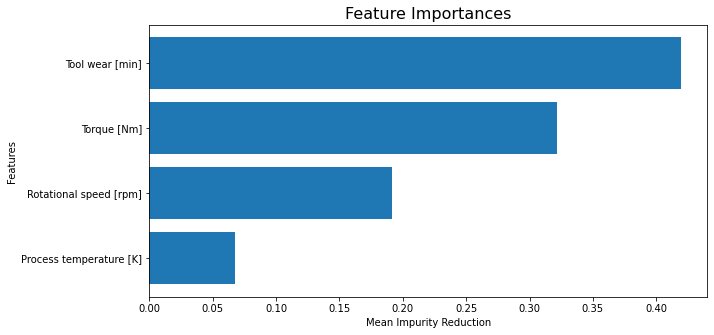

In [137]:
# fitur important
feature =  pd.Series(rf_best.feature_importances_, X_train_handle.columns).sort_values(ascending = True)

# bar plot
plt.figure(figsize = (10,5))
plt.barh(X_train_handle.columns, feature)
plt.xlabel('Mean Impurity Reduction', fontsize = 10)
plt.ylabel('Features', fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Feature Importances', fontsize = 16)
plt.show()

- Untuk klasifikasi model random forest fitur yang paling penting adalah tool wear dan paling kurang diperhatikan adalah process temperatur
- tool wear atau keausan pahat artinya menurut kbbi adalah susut karena tergosok atau kerap dipakai, dari sini dapat diketahui bahwa faktor tertinggi yang mempengaruhi adanya failure atau tidak karena alat/produk tersebut sering digunakan atau tidak
- Untuk suhu proses tidak terlalu berpengaruh karena suhu ini sifatnya berubah-ubah dan dapat disesuaikan.

# **7. Building pipeline**

Dari proses pembuatan model didapatkan model dengan akurasi 88% dan telah divalidasi menggunakan cross validation, model tersebut adalah model Random Forest. Agar lebih mudah digunakan maka proses akan disatukan dalam step pipeline dari scaling dan model 

In [138]:
# buat pipeline
pipeline = make_pipeline(scaler,model_rf)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [139]:
# buat pipeline
pipe = make_pipeline(scaler,rf_grid)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [3, 5],
                                          'min_samples_split': [3, 5]},
                              return_train_score=True, scoring='accuracy'))])

# **8. Model Inference**

Tampilkan data inference yang telah diambil sebelumnya

In [140]:
# tampilkan data inference
data_inf

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2689,L49868,L,299.9,309.4,1322,53.9,33,0,No Failure
1,234,L47413,L,298.2,308.4,1512,34.9,181,0,No Failure
2,9100,H38513,H,297.3,308.1,1477,52.3,2,0,No Failure
3,8653,H38066,H,297.3,308.3,1461,41.5,108,0,No Failure
4,2843,L50022,L,300.3,309.3,1345,53.5,192,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,7195,L54374,L,300.1,310.1,1380,52.6,59,0,No Failure
96,9944,M24803,M,298.3,308.0,1766,26.0,96,0,No Failure
97,9817,M24676,M,298.5,309.2,1721,29.4,170,0,No Failure
98,6317,L53496,L,300.9,310.4,1544,36.0,148,0,No Failure


Sesuaikan kolom-kolom yang digunakan dalam model dan hapus target

In [141]:
data_inf_drop = data_inf.drop(['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Failure Type', 'Target'],axis=1)

Prediksi data inferece menggunakan model best model

In [148]:
#prediksi data menggunakan pipeline
pipeline.fit(X_train_balanced, y_train_balanced)
y_pred_inf = pipeline.predict(data_inf_drop)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [149]:
# buat jadi data frame
data_inf_pred_df = pd.DataFrame(y_pred_inf, columns=['Target-Prediction'])

# Gabungkan data Inference dengan kolom prediksi
data_inf_predic_final = pd.concat([data_inf, data_inf_pred_df], axis=1)
data_inf_predic_final

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Target-Prediction
0,2689,L49868,L,299.9,309.4,1322,53.9,33,0,No Failure,0
1,234,L47413,L,298.2,308.4,1512,34.9,181,0,No Failure,0
2,9100,H38513,H,297.3,308.1,1477,52.3,2,0,No Failure,0
3,8653,H38066,H,297.3,308.3,1461,41.5,108,0,No Failure,0
4,2843,L50022,L,300.3,309.3,1345,53.5,192,0,No Failure,0
...,...,...,...,...,...,...,...,...,...,...,...
95,7195,L54374,L,300.1,310.1,1380,52.6,59,0,No Failure,0
96,9944,M24803,M,298.3,308.0,1766,26.0,96,0,No Failure,0
97,9817,M24676,M,298.5,309.2,1721,29.4,170,0,No Failure,0
98,6317,L53496,L,300.9,310.4,1544,36.0,148,0,No Failure,0


In [150]:
# data aktual
data_inf_predic_final['Target'].value_counts()

0    99
1     1
Name: Target, dtype: int64

In [151]:
# data prediksi
data_inf_predic_final['Target-Prediction'].value_counts()

0    100
Name: Target-Prediction, dtype: int64

- Pipeline yang dibuat telah berhasil diaplikasikan pada data inferece
- Hasil dari 100 data inferece hanya ada 1 data yang salah diprediksi
- Hal tersebut karena data label 0 yang mendominasi sedangkan data label 1 hanya ada 1
- Menerapkan pipeline dan best model ke dalam data inferece telah bisa dilakukan. Terkadanga hasilnya kebalikan dengan yang diload (terkadang muncul 1 semua)

# **9. Model Saving**

Save model yang telah final atau model yang telah digabungkan stepnya dalam pipeline

In [152]:
# saving model
with open('model_rf.pkl', 'wb') as model_rf:
  pickle.dump(pipe, model_rf)

# **10. Kesimpulan**

Pada milestone 2 ini dataset yang digunakan Predictive maintenance dari kaggle yang akan dilakukan klasifikasi apakah alat mengalami failure atau tidak. Dataset terdiri dari 10 kolom dan 10000 baris.

**EDA**
- Berdasarkan heatmap fitur yang memiliki korelasi yang cukup tinggi yaitu torsi, tool wear dan suhu.
- Dataset ini memiliki 2kolom sebagai targetnya, oleh karena itu dipilih salah satu target yaitu kolom 'Target' karena berdasarkan korelasi lebih banyak fitur-fitur yang memiliki korelasi dengan target ini.
- Suhu udara dan suhu proses memiliki korelasi yang cukup besar, oleh karena itu akan dilakukan drop pada kolom suhu udara. Diambil kolom suhu proses karena lebih dapat merepsentasikan jika ingin mengetahui kegagalan suatu produk.
- Data target yang imbalace karena label 1 hanya ada 3,39% dari total keseluruhan data.
- Hubungan antara torsi dan kecepatan putar adalah berbanding terbalik sesuai dengan visualisasi scatterplot

**Preprosessing**
Pada preprossing data inference dipisahkan dengan data set yang asli. Kemudian dilakukan feature selection, data cleaning, scaling dan handling imbalace data.

**Model**
Setiap model dilakukan improve dengan menggunkan hyperparamter tunning dengan cara dilakukan gridsearch dan crossvalidation. Hasil dari model yang telah dilakukan hyperparameter tunning dan memiliki hasil yang paling baik digunakan untuk data inference. Pada kasus ini perlu diperhatikan juga nilai recallnya, karena jika banyak prediksi yang salah maka akan mengakibatkan hal fatal. Karena telah dilakukan handling imbalace data maka kita dapat melihat performa model dari nilai akurasinya.
- Logistic regression, memiliki akurasi data train 0.72 dan test 0.78. hasil ini masih mengalami overfit karena nilai testnya memiliki selisih hingga 6%.
- KNN, memiliki akurasi data train 1.00 dan test 0.72. Model ini tidak direkomendasikan untuk dataset ini karena setelah dilakukan hyperparamter tunning hasilnya masih tetap overfit. Selisih akurasi dari train dan test hingga 28%.
- Naive Bayes, memiliki akurasi data train 0.77 dan test 0.82. Sebenarnya model ini sudah memiliki nilai akurasi yang baik tetapi setelah dicari score validasinya, akurasi dari train dan test tidak berada dalam rentang nilai tersebut. Rata-rata akurasi cross validation 69.6% dengan error +- 6.2%. Rentang nilai validasi akurasi dari cross validation adalah 63.4 - 75.8.
- Random forest, memiliki akurasi data train 0.90 dan test 0.88. Ini adalah model terbaik dibandingkan dengan lainnya. Hasil akurasi rata-rata dari cross validation adalah 86.8 dengan error +- 5.2%, hasil ini cukup mendekati nilai akurasi dari train dan test, rentang akurasi yang tervalidasi adalah 81.6 - 92. Berarti hasil akurasi dari train dan test masuk kedalam rentang nilai tersebut. Berdasarkan feature importance pada model ini, fitur yang paling penting adalah tool wear.

**Model Inference**
Model inferece dalam melakukan prediksinya telah menggunakan pipeline. Hasil dari 100 data inferece hanya ada 1 data yang salah diprediksi. Hal tersebut karena data label 0 yang mendominasi sedangkan data label 1 hanya ada 1.

Secara keseluruhan model yang dibuat penulis merasa masih banyak hal yang harus dimprove seperti urutan dalam handling imbalance data agar tidak terjadi leak data yang menyebabkan overtif, pertimbangan feature selection, penggunaan pipeline yang masih kurang maksimal, mencoba lebih banyak model agar ditemukan model yang cocok untuk dataset tersebut.